# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ".output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [3]:
city_names_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval  ")
print("---------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do the below
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_names_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")
        

Beginning Data Retrieval  
---------------------------------
Processing Record 1 of Set 1 : mookane
Processing Record 2 of Set 1 : victoria
Processing Record 3 of Set 1 : east london
Processing Record 4 of Set 1 : carnarvon
Processing Record 5 of Set 1 : kapaa
Processing Record 6 of Set 1 : kaitangata
Processing Record 7 of Set 1 : punta arenas
Processing Record 8 of Set 1 : vaini
Processing Record 9 of Set 1 : otane
Processing Record 10 of Set 1 : dingle
Processing Record 11 of Set 1 : kumluca
Processing Record 12 of Set 1 : geraldton
Processing Record 13 of Set 1 : biltine
Processing Record 14 of Set 1 : sitrah
Processing Record 15 of Set 1 : southbridge
Processing Record 16 of Set 1 : mogadishu
Processing Record 17 of Set 1 : ushuaia
Processing Record 18 of Set 1 : ukiah
Processing Record 19 of Set 1 : sechura
Processing Record 20 of Set 1 : jumla
Processing Record 21 of Set 1 : busselton
Processing Record 22 of Set 1 : thompson
Processing Record 23 of Set 1 : bethel
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda dataframe using retrieved data
weather_dict = pd.DataFrame({
    "City": city_names_list,
    "Cloudiness": cloudiness_list,
    "Country":country_list,
    "Date": date_list,
    "Humidity": humidity_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Wind Speed": wind_speed_list
})

In [6]:
# Count data
weather_dict.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [7]:
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mookane,3,BW,1619917384,72,-23.6880,26.6595,56.61,12.33
1,Hong Kong,90,HK,1619917254,87,22.2855,114.1577,80.01,3.04
2,East London,0,ZA,1619917384,67,-33.0153,27.9116,60.12,5.91
3,Carnarvon,100,AU,1619917385,64,-24.8667,113.6333,68.00,8.05
4,Kapaa,40,US,1619917385,69,22.0752,-159.3190,80.60,13.80
...,...,...,...,...,...,...,...,...,...
539,Sandakan,20,MY,1619917430,83,5.8402,118.1179,82.40,3.44
540,Santa Vitória,100,BR,1619917535,74,-18.8386,-50.1214,69.21,0.81
541,Labuan,20,MY,1619917535,83,5.2767,115.2417,82.40,4.61
542,Lakhdenpokh'ya,24,RU,1619917536,51,61.5198,30.1992,34.00,4.59


In [9]:
# Save city data to a csv file
weather_dict.to_csv("../output_data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

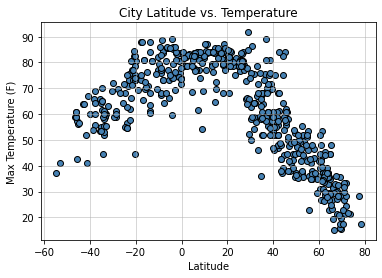

In [10]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set Title
plt.title("City Latitude vs. Temperature")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set gril line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Humidity Plot

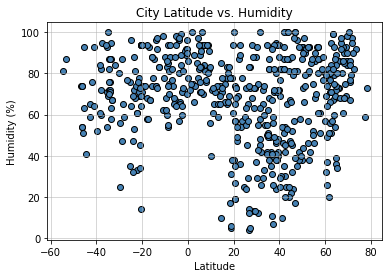

In [11]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set Title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set gril line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Cloudiness Plot

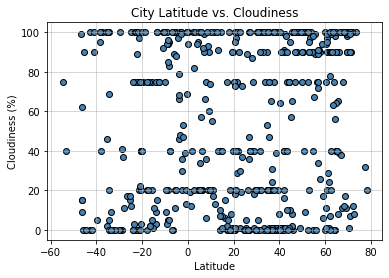

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set Title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set gril line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Wind Speed Plot

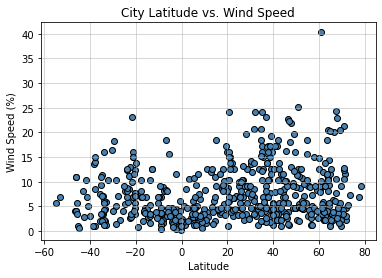

In [13]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set Title
plt.title("City Latitude vs. Wind Speed")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set gril line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [15]:
# Define linear regression and scatter plot functions
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x,y)[0], 2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x,y)
    plt.plot(x,regress_values, "r-")
    return line_eq

# Define a function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.9


Text(0, 0.5, 'Max Temp (F)')

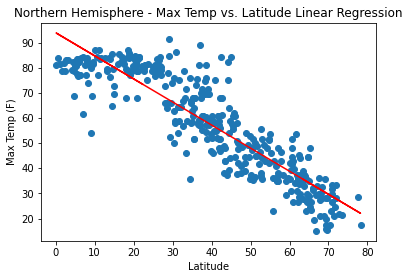

In [16]:
# Call function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
# plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Reg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.73


Text(0, 0.5, 'Max Temp (F)')

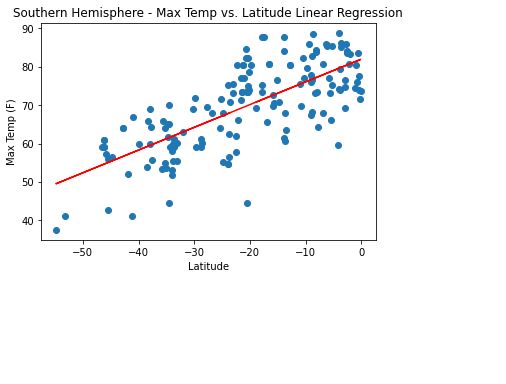

In [17]:
# Call function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.1


Text(0, 0.5, 'Humidity (%)')

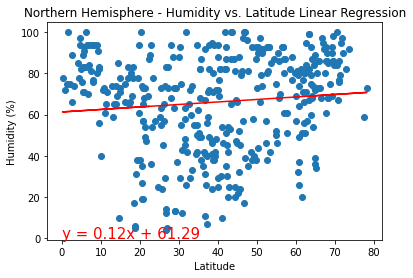

In [18]:
# Call function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.22


Text(0, 0.5, 'Humidity (%)')

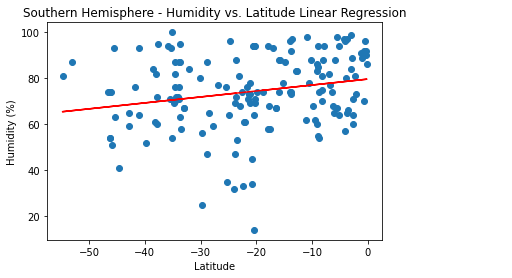

In [19]:
# Call function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.21


Text(0, 0.5, 'Cloudiness (%)')

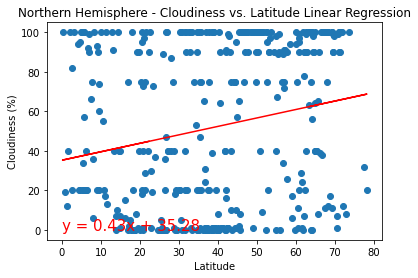

In [20]:
# Call function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.17


Text(0, 0.5, 'Cloudiness (%)')

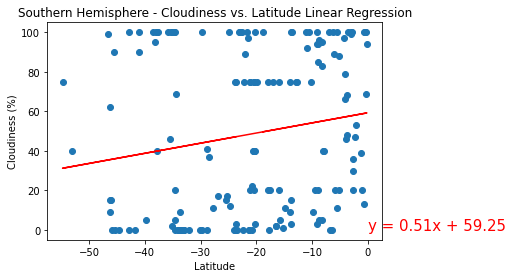

In [21]:
# Call function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.11


Text(0, 0.5, 'Wind Speed (%)')

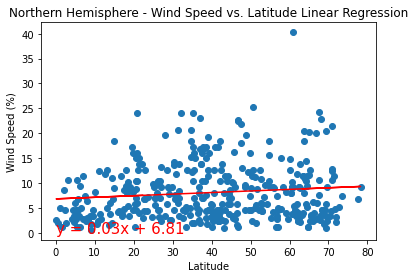

In [22]:
# Call function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (%)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.19


Text(0, 0.5, 'Wind Speed (%)')

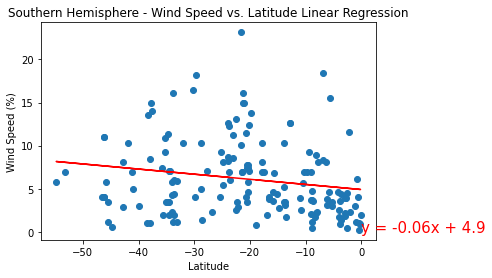

In [23]:
# Call function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call function #2
annotate(equation, 0, 0)

# Set title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (%)")